# Analyse des mots extracter des reviews de nos clients de Mcdonald



In [ ]:
from textblob import TextBlob

In [ ]:
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
import pandas as pd

Importer le fichier comporant les reviews des clients Mcdonald 


In [ ]:
data = pd.read_csv("reviewfr.csv") 

In [ ]:
data

,reviews,index
0,Déplorable déplorable déplorable pire service ...,0
1,l'un des points de restauration rapides le moi...,1
2,je ne comprends pas les avis négatifs ! On est...,2
3,Bonsoir commande borne n 80 ils ont servi jusq...,3
4,L'enseigne Mc Donald's est connue par beaucoup...,4
...,...,...
255,Joliment décorée à l'intérieur et la nourritur...,255
256,Nous y avons mangé sur notre première journée ...,256
257,La nourriture est identique dans tous les pays...,257
258,Je suis le ventilateur McDonald's et c'était l...,258


En se basant sur la bibliotheque TextBlob, une analyse de sentiment est faite à travers la polarité de chaque mot dans les reviews de nos clients



In [ ]:
string=""

In [ ]:
for review in data['reviews']:
    string=string+review

In [ ]:
blob = TextBlob(string, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [ ]:
words=blob.words

In [ ]:
rows = []
i=0
for x in words: 
     rows.append([x, TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]])
     i=i+1


In [ ]:
df = pd.DataFrame(rows, columns=["words", "polarity"])
print(df)

              words  polarity
0        Déplorable     -0.15
1        déplorable     -0.15
2        déplorable     -0.15
3              pire     -0.40
4           service      0.00
...             ...       ...
10856         chose      0.00
10857            de      0.00
10858        rapide      0.35
10859           sur      0.00
10860  l'aller.Plus      0.00

[10861 rows x 2 columns]


In [ ]:
df

,words,polarity
0,Déplorable,-0.15
1,déplorable,-0.15
2,déplorable,-0.15
3,pire,-0.40
4,service,0.00
...,...,...
10856,chose,0.00
10857,de,0.00
10858,rapide,0.35
10859,sur,0.00


**Les mots positives ( ayant une polarité > 0.70)**

In [ ]:
dfPos = df
dfPos = dfPos[(dfPos.polarity >= 0.7) ]
dfPos

,words,polarity
74,agréable,0.7
80,parfait,0.8
545,bon,0.7
1042,agréable,0.7
1397,indispensable,0.8
...,...,...
10347,agréable,0.7
10489,bonne,0.7
10524,bon,0.7
10549,bon,0.7


Les mots negatives ( ayant une polarité < -0.1)


In [ ]:
# PS : j'ai choisis -0.1 vu qu'il y'a bcp d'avis negatives et donc le plot en dessous prends trop de temps a charger (-0.1 peut etre changer)
dfNeg = df
dfNeg = dfNeg[(dfNeg.polarity <= -1.0) ]
dfNeg

,words,polarity
888,horrible,-1.0
1081,déçus,-1.0
2001,déçu,-1.0
3502,déçue,-1.0
3905,déçu,-1.0
4001,déçu,-1.0
4031,horrible,-1.0
4073,déçu,-1.0
4948,déçue,-1.0
5056,déçue,-1.0



# La visualisation 


In [ ]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 20
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

20
10


## Les mots positives : 

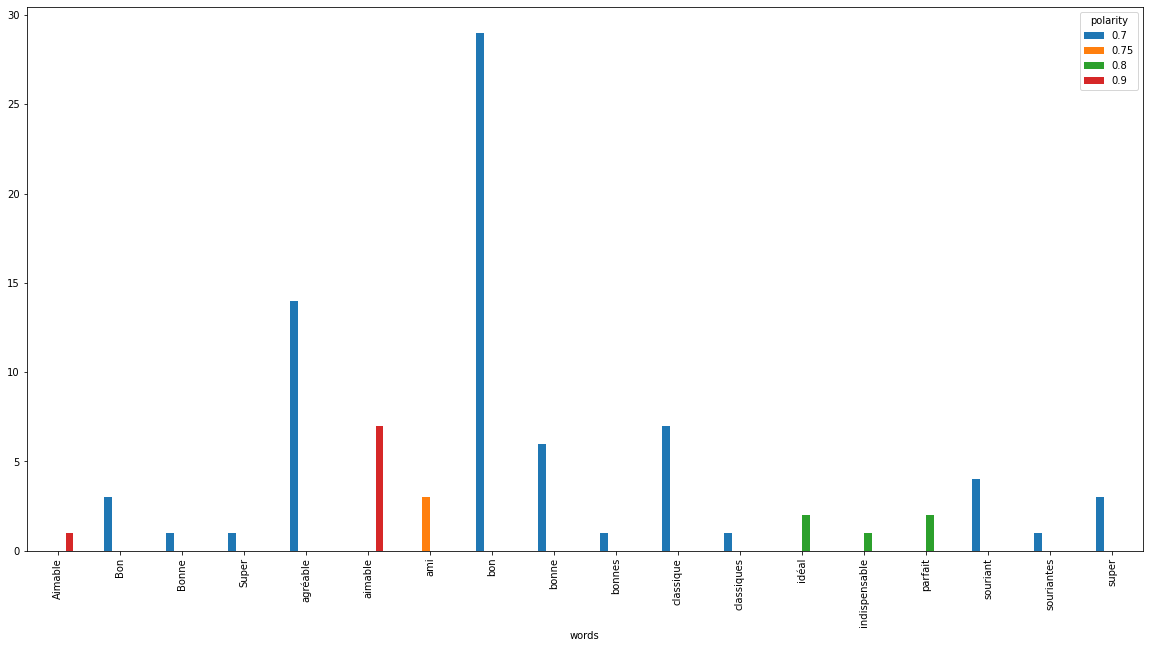

In [ ]:
plt =  dfPos.groupby(['words', 'polarity']).polarity.count().unstack()
plt.plot(kind='bar')

## Les mots negatives


In [ ]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 20
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

In [ ]:
plt =  dfNeg.groupby(['words', 'polarity']).polarity.count().unstack()
plt.plot(kind='bar')